In [1]:
import pandas as pd

In [2]:
meds = pd.read_csv('meds_cleaned_v1')

In [3]:
meds

Age  Gender  Heart rate  Systolic bp  Diastolic bp  Blood sugar  CK-MB  \
0      63       1          66          160            83        160.0   1.80   
1      20       1          94           98            46        296.0   6.75   
2      56       1          64          160            77        270.0   1.99   
3      66       1          70          120            55        270.0  13.87   
4      54       1          64          112            65        300.0   1.08   
...   ...     ...         ...          ...           ...          ...    ...   
1240   44       1          94          122            67        204.0   1.63   
1241   66       1          84          125            55        149.0   1.33   
1242   45       1          85          168           104         96.0   1.24   
1243   54       1          58          117            68        443.0   5.80   
1244   51       1          94          157            79        134.0  50.89   

      Troponin    Result  
0        0.012  negative  
1        1.060  positive  
2        0.003  negative  
3        0.122  positive  
4        0.003  negative  
...        ...       ...  
1240     0.006  negative  
1241     0.172  positive  
1242     4.250  positive  
1243     0.359  positive  
1244     1.770  positive  

[1245 rows x 9 columns]

In [5]:
pip install pycaret

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
from pycaret.classification import ClassificationExperiment

In [5]:
s = ClassificationExperiment()
s.setup(data = meds, target = 'Result', transformation = True,
        remove_multicollinearity = True, normalize = True)

In [6]:
s.compare_models()

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=6770, verbose=0,
                       warm_start=False)

In [7]:
model = s.create_model('rf')

In [8]:
s.predict_model(model)

Age  Gender  Heart rate  Systolic bp  Diastolic bp  Blood sugar  \
410    65       1          70          142            75        108.0   
921    43       0          75          150            95        103.0   
529    35       1          61          125            80        100.0   
159    60       0         100          170           103        197.0   
1176   60       1          64          140            90        230.0   
...   ...     ...         ...          ...           ...          ...   
1050   50       1          75          116            71        126.0   
916    70       1         112          170           104        117.0   
68     54       0          58          130            80        125.0   
1170   37       1          78           95            59        107.0   
1073   70       1          76          136            82        233.0   

           CK-MB  Troponin    Result prediction_label  prediction_score  
410   165.000000     0.058  positive         positive              1.00  
921    81.839996     0.005  positive         positive              0.90  
529     7.660000     0.003  positive         positive              0.90  
159     3.360000     0.012  negative         negative              0.93  
1176    1.250000     0.009  negative         negative              0.94  
...          ...       ...       ...              ...               ...  
1050    2.240000     0.053  positive         positive              0.99  
916     3.950000     0.012  negative         negative              0.76  
68      3.300000     0.006  negative         negative              0.94  
1170   39.340000     0.022  positive         positive              1.00  
1073    2.560000     2.160  positive         positive              0.97  

[374 rows x 11 columns]

In [9]:
cols = meds.columns.to_list()


In [10]:
cols.pop()

'Result'

In [11]:
cols

['Age',
 'Gender',
 'Heart rate',
 'Systolic bp',
 'Diastolic bp',
 'Blood sugar',
 'CK-MB',
 'Troponin']

In [12]:
new = [50, 0,89, 100, 50, 92.0, 16.950001, 0.023]

In [13]:
unseen = pd.DataFrame([new], columns=cols)

In [14]:
s.predict_model(model, data = unseen)

Age  Gender  Heart rate  Systolic bp  Diastolic bp  Blood sugar      CK-MB  \
0   50       0          89          100            50         92.0  16.950001   

   Troponin prediction_label  prediction_score  
0     0.023         positive              0.96

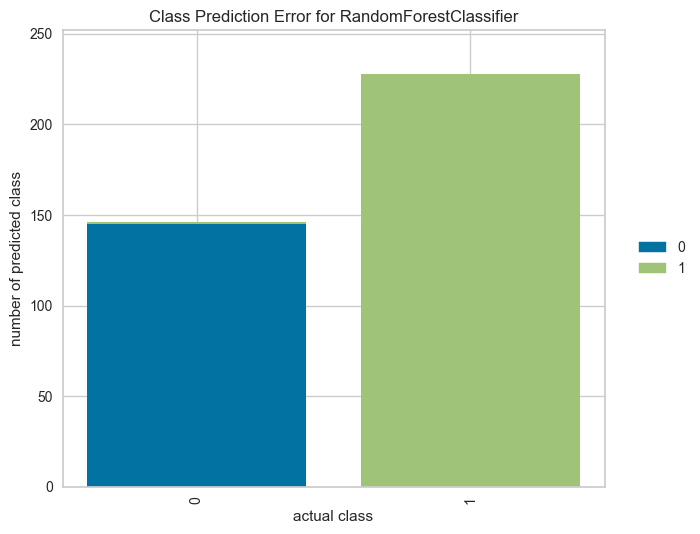

In [15]:
s.plot_model(model, plot = 'error')

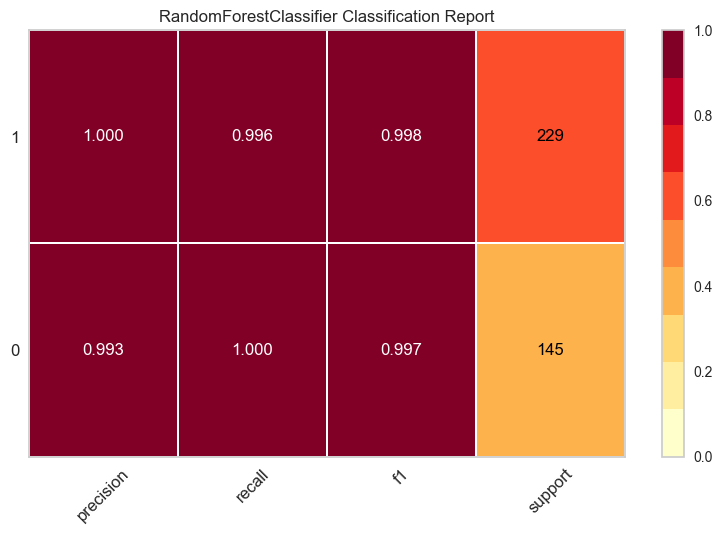

In [16]:
s.plot_model(model, plot = 'class_report')

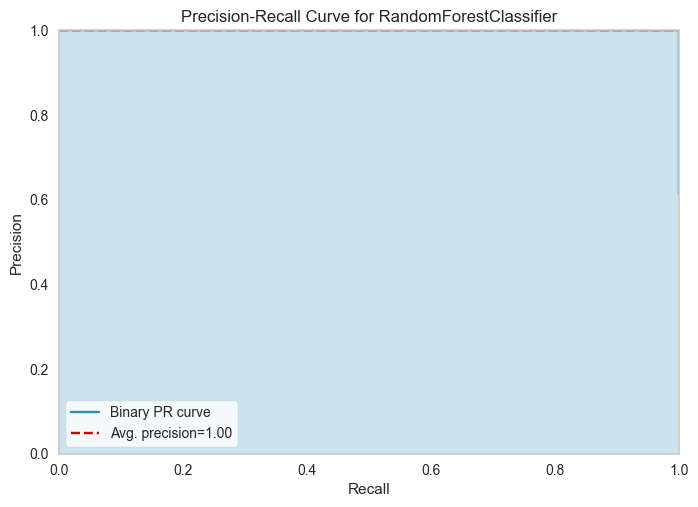

In [17]:
s.plot_model(model, plot = 'pr')

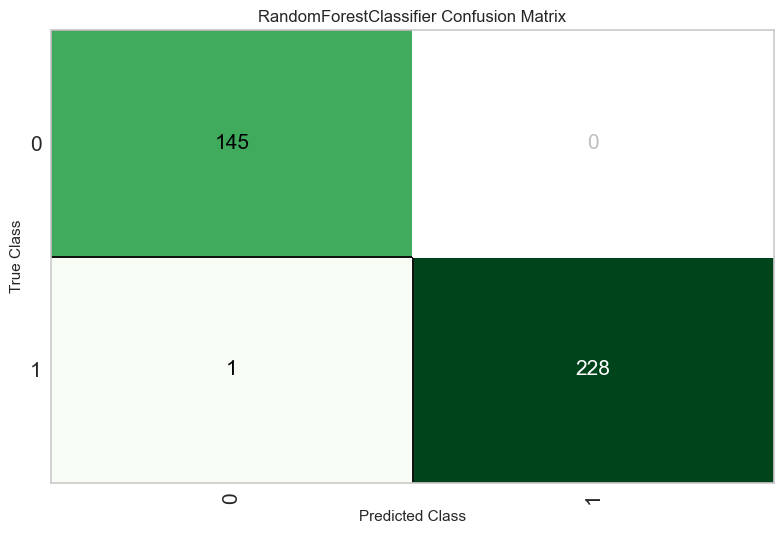

In [18]:
s.plot_model(model, plot = 'confusion_matrix')

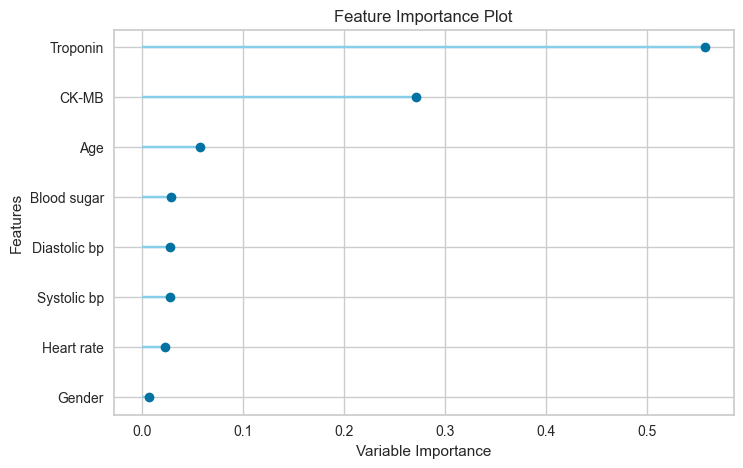

In [19]:
s.plot_model(model, plot = 'feature')

In [ ]:
meds

Age  Gender  Heart rate  Systolic bp  Diastolic bp  Blood sugar  CK-MB  \
0      63       1          66          160            83        160.0   1.80   
1      20       1          94           98            46        296.0   6.75   
2      56       1          64          160            77        270.0   1.99   
3      66       1          70          120            55        270.0  13.87   
4      54       1          64          112            65        300.0   1.08   
...   ...     ...         ...          ...           ...          ...    ...   
1240   44       1          94          122            67        204.0   1.63   
1241   66       1          84          125            55        149.0   1.33   
1242   45       1          85          168           104         96.0   1.24   
1243   54       1          58          117            68        443.0   5.80   
1244   51       1          94          157            79        134.0  50.89   

      Troponin    Result  
0        0.012  negative  
1        1.060  positive  
2        0.003  negative  
3        0.122  positive  
4        0.003  negative  
...        ...       ...  
1240     0.006  negative  
1241     0.172  positive  
1242     4.250  positive  
1243     0.359  positive  
1244     1.770  positive  

[1245 rows x 9 columns]

In [20]:
import numpy as np
num_rows = 10

# Generate random values for each column
age = np.random.randint(20, 80, size=num_rows)
gender = np.random.choice([0, 1], size=num_rows)
heart_rate = np.random.randint(60, 120, size=num_rows)
systolic_bp = np.random.randint(90, 140, size=num_rows)
diastolic_bp = np.random.randint(60, 90, size=num_rows)
blood_sugar = np.random.uniform(70, 120, size=num_rows)
ck_mb = np.random.uniform(5, 25, size=num_rows)
troponin = np.random.uniform(0, 0.1, size=num_rows)

# Create a DataFrame with the generated data
data = pd.DataFrame({
    'Age': age,
    'Gender': gender,
    'Heart rate': heart_rate,
    'Systolic bp': systolic_bp,
    'Diastolic bp': diastolic_bp,
    'Blood sugar': blood_sugar,
    'CK-MB': ck_mb,
    'Troponin': troponin
})

# Display the generated data
data

Age  Gender  Heart rate  Systolic bp  Diastolic bp  Blood sugar      CK-MB  \
0   53       1          71          107            69    87.530375   5.069008   
1   49       1          78          127            73    87.616916  18.356378   
2   59       1          82          138            71   109.937414  19.768418   
3   20       1          99          138            61    90.888368   6.299799   
4   55       0          72           97            87    70.092973   7.835601   
5   25       1         106          112            85    89.079145  19.812287   
6   65       0          86          126            74   109.937956  19.246455   
7   77       1          65          130            83   105.330379   7.832016   
8   57       1          62          111            80    98.996924  10.433175   
9   67       1         115           95            82    77.018872  17.370492   

   Troponin  
0  0.018386  
1  0.090357  
2  0.048997  
3  0.036849  
4  0.066380  
5  0.052252  
6  0.012629  
7  0.069961  
8  0.032343  
9  0.037522

In [ ]:
s.predict_model(model, data = data)

Age  Gender  Heart rate  Systolic bp  Diastolic bp  Blood sugar      CK-MB  \
0   67       0          91          117            68    70.871696  18.394344   
1   34       0         119           91            69    74.050575   5.354595   
2   32       0         119          120            74   117.591866  24.903051   
3   50       0          83           95            72   114.829910  18.099983   
4   21       1          70          134            72   118.393539   8.050880   
5   50       0          79          109            63   101.458221   9.050685   
6   59       1          60          107            60    80.669823  23.059719   
7   40       1          82           94            79   112.759041  15.066584   
8   75       0          60          110            65    75.306534  17.735004   
9   23       0         108           94            80    93.620697   7.025770   

   Troponin prediction_label  prediction_score  
0  0.053080         positive            1.0000  
1  0.006180         negative            0.9100  
2  0.008279         positive            0.9996  
3  0.065366         positive            1.0000  
4  0.019981         positive            1.0000  
5  0.070462         positive            1.0000  
6  0.043806         positive            1.0000  
7  0.004520         positive            0.9999  
8  0.015543         positive            1.0000  
9  0.054583         positive            0.9985

In [ ]:
s.predict_model(model, data = meds.sample(20))

Age  Gender  Heart rate  Systolic bp  Diastolic bp  Blood sugar  \
1216   42       0          70          117            76        100.0   
1228   43       1          90           95            50        118.0   
972    64       1          67          120            60        240.0   
345    90       1          59          164            75        415.0   
1191   67       1          77          122            58        368.0   
1208   55       0          73          138            79        105.0   
254    61       1          59           91            55        103.0   
243    44       1          71          143            71        104.0   
543    72       0          83          123            67        283.0   
0      63       1          66          160            83        160.0   
855    70       1          63          170           104        144.0   
122    30       1          85          135            65        105.0   
48     63       0          81          130            65         98.0   
670    73       1          83          130            75        108.0   
1073   70       1          76          136            82        233.0   
153    32       1          72          136            80        111.0   
145    50       0          72           91            70        147.0   
1136   84       0          65          129            75         88.0   
517    72       0          82          138            82        195.0   
976    67       0          88          152            87        115.0   

          CK-MB  Troponin    Result prediction_label  prediction_score  
1216   4.240000     0.003  negative         negative            0.9990  
1228   1.330000     0.544  positive         positive            0.9997  
972    5.220000     0.009  negative         negative            0.9956  
345    5.870000     0.014  negative         negative            0.9957  
1191   2.350000     0.008  negative         negative            0.9998  
1208   1.610000     0.009  negative         negative            1.0000  
254    2.940000     0.011  negative         negative            0.9999  
243    1.190000     0.070  positive         positive            1.0000  
543    2.120000     0.026  positive         positive            1.0000  
0      1.800000     0.012  negative         negative            1.0000  
855    2.410000     0.016  positive         positive            1.0000  
122    3.250000     0.005  negative         negative            0.9999  
48     2.280000     0.040  positive         positive            1.0000  
670    1.630000     0.008  negative         negative            1.0000  
1073   2.560000     2.160  positive         positive            1.0000  
153    5.600000     0.003  negative         negative            0.9529  
145    2.740000     0.063  positive         positive            1.0000  
1136  31.219999     0.013  positive         positive            0.9998  
517    1.790000     0.008  negative         negative            1.0000  
976    2.020000     0.005  negative         negative            1.0000

In [21]:
s.save_model(model, 'meds_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Age', 'Gender', 'Heart rate',
                                              'Systolic bp', 'Diastolic bp',
                                              'Blood sugar', 'CK-MB',
                                              'Troponin'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=Tr...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max_features='sqrt',
           

In [22]:
model = s.load_model('meds_model') 

Transformation Pipeline and Model Successfully Loaded


In [23]:
s.predict_model(model, data = meds.sample(20))

Age  Gender  Heart rate  Systolic bp  Diastolic bp  Blood sugar  \
1094   41       1          89           87            53        140.0   
855    70       1          63          170           104        144.0   
1066   60       0          89          111            57        194.0   
299    21       0          62           76            55        111.0   
741    64       1          82          138            93         77.0   
911    47       0          85          138            98        321.0   
567    82       0          88          152            87         99.0   
139    44       0          91          100            71        116.0   
679    60       1          98          110            76         99.0   
604    72       1          64          112            65        104.0   
674    60       0          90          125            73        174.0   
257    38       0          59          100            56         92.0   
721    66       1          73          115            72        224.0   
812    65       1          67          177           105        120.0   
922    60       1          80          127            82        100.0   
811    41       1          58           93            48        122.0   
1175   37       1          88          119            66        118.0   
490    52       1         100          119            66        127.0   
1119   65       1          84          126            75        382.0   
182    46       1          69          165            94         95.0   

           CK-MB  Troponin    Result prediction_label  prediction_score  
1094    2.140000     0.003  negative         negative              0.98  
855     2.410000     0.016  positive         positive              1.00  
1066    2.170000     0.348  positive         positive              0.96  
299     3.110000     0.003  negative         negative              0.95  
741     8.080000     0.021  positive         positive              0.98  
911     1.880000     0.880  positive         positive              0.97  
567     1.210000     0.004  negative         negative              0.90  
139     7.020000     0.014  negative         negative              0.69  
679     3.170000     0.025  positive         positive              0.99  
604    23.799999     0.041  positive         positive              1.00  
674     3.140000     0.006  negative         negative              0.96  
257    15.670000     0.006  positive         positive              0.98  
721     3.480000     0.009  negative         negative              0.92  
812     3.680000     0.011  negative         negative              0.83  
922   247.800003     0.007  positive         positive              0.98  
811     3.590000     0.048  positive         positive              0.95  
1175    5.780000     0.006  negative         negative              0.96  
490    11.730000     0.018  positive         positive              1.00  
1119    1.010000     0.018  positive         positive              0.95  
182     2.820000     0.009  negative         negative              0.91